# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions and limitation">Conclusions and limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset "tmdb-movies" contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like "cast" and "genres", contain multiple values separated by pipe (|) characters and some odd characters in the "cast" The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
1. What kinds of properties are associated with movies that have high revenues? 
2. What year had the highest number of movies released?
3. Can we create a table of actors and number of movies starred in by each actor in the dataset?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

## Data Wrangling

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv"
df_movies=pd.read_csv(url)
df_movies.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [4]:
df_movies.shape

(10866, 21)

In [5]:
df_movies.tail()

id    imdb_id  popularity  budget  revenue  \
10861     21  tt0060371    0.080598       0        0   
10862  20379  tt0060472    0.065543       0        0   
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10861        The Endless Summer   
10862                Grand Prix   
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

                 director                                            tagline  \
10861         Bruce Brown                                                NaN   
10862  John Frankenheimer  Cinerama sweeps YOU into a drama of speed and ...   
10863      Eldar Ryazanov                                                NaN   
10864         Woody Allen                          WOODY ALLEN STRIKES BACK!   
10865    Harold P. Warren       It's Shocking! It's Beyond Your Imagination!   

       ...                                           overview runtime  \
10861  ...  The Endless Summer, by Bruce Brown, is one of ...      95   
10862  ...  Grand Prix driver Pete Aron is fired by his te...     176   
10863  ...  An insurance agent who moonlights as a carthie...      94   
10864  ...  In comic Woody Allen's film debut, he took the...      80   
10865  ...  A family gets lost on the road and stumbles up...      74   

                       genres  \
10861             Documentary   
10862  Action|Adventure|Drama   
10863          Mystery|Comedy   
10864           Action|Comedy   
10865                  Horror   

                                    production_companies release_date  \
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

      vote_count  vote_average  release_year     budget_adj  revenue_adj  
10861         11           7.4          1966       0.000000          0.0  
10862         20           5.7          1966       0.000000          0.0  
10863         11           6.5          1966       0.000000          0.0  
10864         22           5.4          1966       0.000000          0.0  
10865         15           1.5          1966  127642.279154          0.0  

[5 rows x 21 columns]

In [6]:
df_movies.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [7]:
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
df_movies['cast'].unique()

array(["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson",
       'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman',
       'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller',
       ...,
       'Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya',
       'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru',
       'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson'],
      dtype=object)

In [10]:
df_movies['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [11]:
df_movies['revenue'].unique()

array([1513528810,  378436354,  295238201, ...,     321952,   78000000,
         33736689], dtype=int64)

In [12]:
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning
>The dataset has 21 columns and  10866 rows. Certain columns, like 'cast' and 'genres'  have multiple values separated by pipe (|) characters.
There are missing values in the 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords','overview', 'genres' and 'production_companies' columns
The pipe character has to be removed missing rows dropped and some columns which are not relevant to this analysis will be dropped as well.

In [13]:
#Creating a new list 'dfx' from panda series of cast

df_mov_ca=df_movies['cast']
df_mov_ca.head()

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2    Shailene Woodley|Theo James|Kate Winslet|Ansel...
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4    Vin Diesel|Paul Walker|Jason Statham|Michelle ...
Name: cast, dtype: object

In [14]:
dfx=[i for i in df_mov_ca]
print(dfx[:10])

["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson", 'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman', 'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller', 'Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley', 'Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson', 'Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson', 'Arnold Schwarzenegger|Jason Clarke|Emilia Clarke|Jai Courtney|J.K. Simmons', 'Matt Damon|Jessica Chastain|Kristen Wiig|Jeff Daniels|Michael PeÃ±a', 'Sandra Bullock|Jon Hamm|Michael Keaton|Allison Janney|Steve Coogan', 'Amy Poehler|Phyllis Smith|Richard Kind|Bill Hader|Lewis Black']


In [15]:
        """ Creating list of lists 'dfy' by removing the '|' symbol from 'dfx' list """
    
dfy=[str(x).split('|') for x in dfx]
print(dfy[:10])

[['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan Khan', "Vincent D'Onofrio", 'Nick Robinson'], ['Tom Hardy', 'Charlize Theron', 'Hugh Keays-Byrne', 'Nicholas Hoult', 'Josh Helman'], ['Shailene Woodley', 'Theo James', 'Kate Winslet', 'Ansel Elgort', 'Miles Teller'], ['Harrison Ford', 'Mark Hamill', 'Carrie Fisher', 'Adam Driver', 'Daisy Ridley'], ['Vin Diesel', 'Paul Walker', 'Jason Statham', 'Michelle Rodriguez', 'Dwayne Johnson'], ['Leonardo DiCaprio', 'Tom Hardy', 'Will Poulter', 'Domhnall Gleeson', 'Paul Anderson'], ['Arnold Schwarzenegger', 'Jason Clarke', 'Emilia Clarke', 'Jai Courtney', 'J.K. Simmons'], ['Matt Damon', 'Jessica Chastain', 'Kristen Wiig', 'Jeff Daniels', 'Michael PeÃ±a'], ['Sandra Bullock', 'Jon Hamm', 'Michael Keaton', 'Allison Janney', 'Steve Coogan'], ['Amy Poehler', 'Phyllis Smith', 'Richard Kind', 'Bill Hader', 'Lewis Black']]


In [16]:
# The list 'df_ca_final_list' contains each item from the 'dfy' lists and removing missing values 
#    from dataset which appeared in the list as 'nan'.

df_ca_final_list=[]
for i in dfy:
    for x in i:
        if x=='nan':
            i.remove(x)
        else:
            df_ca_final_list.append(x)
print(df_ca_final_list.count('nan'))
print(df_ca_final_list[:20])

0
['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan Khan', "Vincent D'Onofrio", 'Nick Robinson', 'Tom Hardy', 'Charlize Theron', 'Hugh Keays-Byrne', 'Nicholas Hoult', 'Josh Helman', 'Shailene Woodley', 'Theo James', 'Kate Winslet', 'Ansel Elgort', 'Miles Teller', 'Harrison Ford', 'Mark Hamill', 'Carrie Fisher', 'Adam Driver', 'Daisy Ridley']


>

In [17]:
                    """   defining two fuctions to create two lists which contains each item 
                                and count of each item respectively in an inputed list  """

def castz(listed):
    return (listed[listed.index(i)] for i in listed)

def item_count(listed):
    return (listed.count(i) for i in listed)

In [18]:
                            """  The Dictionary 'dict_ca_list' is created from two lists 
                                'x' and 'z' by calling the functions ' castz() ' and ' item_count ' """


x = item_count(df_ca_final_list)
z = castz(df_ca_final_list)
dict_ca_list={'cast':z, 'num_of_movies_feat':x}

In [19]:
                                    """ Creating a table of Actors and Number of movies"""
                                    
df_dict_ca_list=pd.DataFrame(dict_ca_list)
df_dict_ca_list.head()

cast  num_of_movies_feat
0          Chris Pratt                  10
1  Bryce Dallas Howard                   7
2          Irrfan Khan                   6
3    Vincent D'Onofrio                  24
4        Nick Robinson                   5

In [20]:
          ''' Dropping duplicate rows in table of actors and number of movies featured in '''

df_dict_ca_list_non_dup=df_dict_ca_list.drop_duplicates()

In [21]:
# Dropping columns not relevant to our analysis

df_movies.drop(['homepage','tagline','keywords', 'production_companies', 'genres', 'imdb_id', 'overview', 'director'], axis=1, inplace=True)

In [22]:
# Dropping rows with missing values in the 'cast' column
df_movies.dropna(inplace=True)
df_movies['cast'].isnull().sum()

0

## Exploratory Data Analysis




In [23]:
profile=ProfileReport(df_movies, title='Exploratory Analysis of tmdb-movies dataset', html={'style': {'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Summary Exploration of the cleaned dataset showing:
        1. columns with high correlation.
        2. No missing values
        3. Interactions between columns

### Research Question 1  (What kinds of properties are associated with movies that have high revenues?)

>Line Plots of the 'popularity', 'budget_adj' and 'revenue' columns

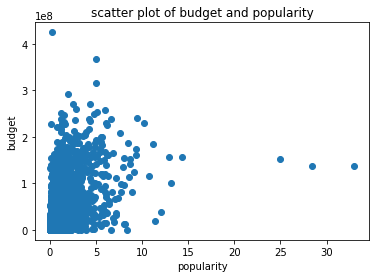

In [24]:
                            """ Scatter plot of budget and popularity"""

plt.scatter(df_movies.popularity, df_movies.budget_adj)
plt.xlabel('popularity')
plt.ylabel('budget')
plt.title('scatter plot of budget and popularity')
plt.show()

In [25]:
                                """defining a function plotz for line plots"""

def plotz(data, x_labelz, y_labelz, titlez):
    plt.plot(data)
    plt.xlabel(x_labelz)
    plt.ylabel(y_labelz)
    plt.title(titlez)
    plt.show()
    
                                """defining another function plotz_2d for 2D plots"""
        
def plotz_2d(data_1, data_2, x_labelz, y_labelz, titlez, colorz):
    fig, ax = plt.subplots()
    ax.plot(data_1, data_2, color=colorz);
    ax.set_xlabel(x_labelz);
    ax.set_ylabel(y_labelz);
    ax.set_title(titlez)

In [26]:
                                        """Calling the functions"""

'Calling the functions'

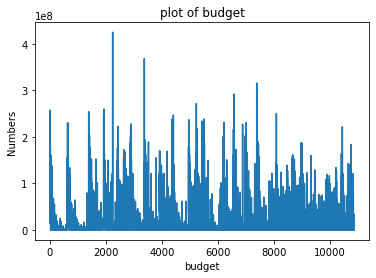

In [27]:
plotz(df_movies.budget_adj, 'budget', 'Numbers', 'plot of budget')

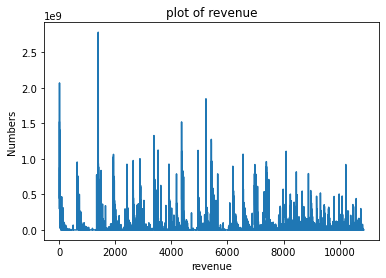

In [28]:
plotz(df_movies.revenue, 'revenue', 'Numbers', 'plot of revenue')

>Plots showing correlation between 'popularity' and 'budget_adj' with 'revenue'

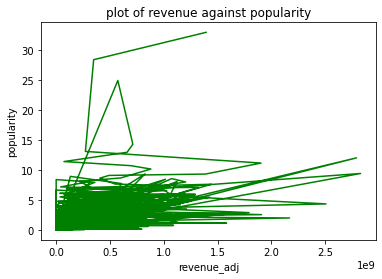

In [29]:
plotz_2d(df_movies['revenue_adj'], df_movies['popularity'], 'revenue_adj', 'popularity', 'plot of revenue against popularity', 'g')

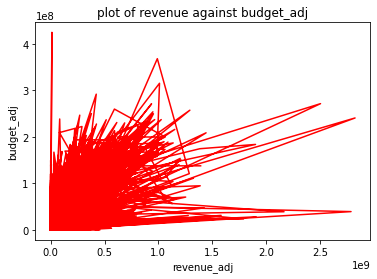

In [30]:
plotz_2d(df_movies['revenue_adj'], df_movies['budget_adj'], 'revenue_adj', 'budget_adj', 'plot of revenue against budget_adj', 'r')

In [31]:
                        """  Table of Correlations between the columns  """

df_movies.corr()

id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000   -0.011797 -0.140250 -0.098418 -0.088712   -0.034231   
popularity   -0.011797    1.000000  0.544779  0.663082  0.137417    0.800730   
budget       -0.140250    0.544779  1.000000  0.734655  0.190286    0.632354   
revenue      -0.098418    0.663082  0.734655  1.000000  0.162485    0.791022   
runtime      -0.088712    0.137417  0.190286  0.162485  1.000000    0.163144   
vote_count   -0.034231    0.800730  0.632354  0.791022  0.163144    1.000000   
vote_average -0.065794    0.214578  0.084818  0.176143  0.170476    0.257761   
release_year  0.510438    0.091636  0.117607  0.058105 -0.120253    0.109210   
budget_adj   -0.188125    0.512735  0.968917  0.706151  0.220303    0.586640   
revenue_adj  -0.137890    0.608700  0.622100  0.919043  0.175405    0.707713   

              vote_average  release_year  budget_adj  revenue_adj  
id               -0.065794      0.510438   -0.188125    -0.137890  
popularity        0.214578      0.091636    0.512735     0.608700  
budget            0.084818      0.117607    0.968917     0.622100  
revenue           0.176143      0.058105    0.706151     0.919043  
runtime           0.170476     -0.120253    0.220303     0.175405  
vote_count        0.257761      0.109210    0.586640     0.707713  
vote_average      1.000000     -0.122812    0.097195     0.196908  
release_year     -0.122812      1.000000    0.018173    -0.065620  
budget_adj        0.097195      0.018173    1.000000     0.646222  
revenue_adj       0.196908     -0.065620    0.646222     1.000000

In [32]:
np.corrcoef(df_movies['revenue_adj'], df_movies['budget_adj'])

array([[1.        , 0.64622195],
       [0.64622195, 1.        ]])

In [33]:
np.corrcoef(df_movies['revenue_adj'], df_movies['popularity'])



array([[1.        , 0.60870027],
       [0.60870027, 1.        ]])

### Research Question 2 (What year had the highest number of movies released?)

>The histogram plot below shows the years and number of movies released in each year

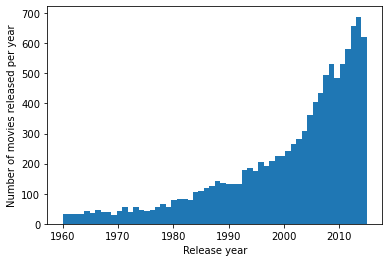

In [34]:
plt.hist(df_movies['release_year'],bins=56);
plt.xlabel('Release year');
plt.ylabel('Number of movies released per year');
plt.show()

In [35]:
# Calling the count function on the dataset returns the year with the highest value
l=df_movies['release_year'].value_counts()
print(max(l))

688


### Research Question 3 (Can we create a table of actors and number of movies starred in by each actor in the dataset?)

>We explore the " df_dict_ca_list_non_dup " data frame to get the Actor with the highest number of features.

In [36]:
maxx=max(df_dict_ca_list_non_dup['num_of_movies_feat'])
print(maxx)

72


In [37]:
print(df_dict_ca_list_non_dup[df_dict_ca_list_non_dup['num_of_movies_feat']==maxx])

               cast  num_of_movies_feat
255  Robert De Niro                  72


## Conclusions and limitations
       Though the dataset contained a few outliers, unwanted characters and missing values which needed to be cleaned as 
       they were not relevant to our analysis, there certainly were no limitations ( with respect to the information we 
       needed from the dataset). 
       The popularity and budget columns contained sufficient values to give the information we needed. 
       So there was no limitations as data could be successfully manipulated to answer the questions asked.

    results obtained from this analysis showed that: 
        1. The revenue generated by a movie was highly influenced by the popularity of the movie and its budget. 
        2. Highest number of movies was released in 2014 (Total 700 movies). 
        3. Robert De Niro was featured in the most movies (72 movies)